<a href="https://colab.research.google.com/github/Knp0/website-templates/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Rides and the Poisson Model

To help the urban planners, you are called to model the daily bike rides in NYC using [this dataset](https://gist.github.com/sachinsdate/c17931a3f000492c1c42cf78bf4ce9fe/archive/7a5131d3f02575668b3c7e8c146b6a285acd2cd7.zip).  The dataset contains date, day of the week, high and low temp, precipitation and bike ride couunts as columns. 



## Maximum Likelihood I 
 
The obvious choice in distributions is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean. 

References: 

1. [This blog post](https://towardsdatascience.com/the-poisson-process-everything-you-need-to-know-322aa0ab9e9a). 

2. [This blog post](https://towardsdatascience.com/understanding-maximum-likelihood-estimation-fa495a03017a) and note the negative  log likelihood function.  


In [36]:
from google.colab import drive
drive.mount('/content/drive')
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'Colab-Notebooks/'
/content/drive/MyDrive/Colab-Notebooks
1.5hw.ipynb  hw2.ipynb    nyc_bb_bicyclist_counts.csv
CS482.ipynb  kaggle.json  Untitled0.ipynb


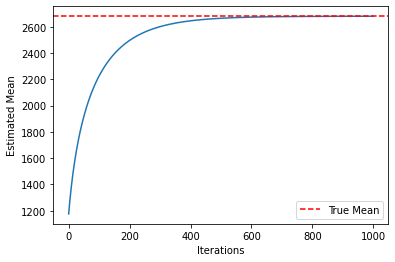

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('nyc_bb_bicyclist_counts.csv')

# Extract the bike ride counts column
counts = data['BB_COUNT'].values

# Initialize lambda 
lambda_ = 50

# Set the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 1000

# Initialize the list to store the estimated means
estimated_means = []

# Iterate over the number of iterations
for i in range(num_iterations):
    dNLL_dlambda = -np.sum(counts/lambda_ - 1)
    lambda_ -= learning_rate * dNLL_dlambda
    estimated_means.append(lambda_)
    
# Plot the estimated means vs iterations
plt.plot(estimated_means)
plt.axhline(y=np.mean(counts), color='r', linestyle='--', label='True Mean')
plt.xlabel('Iterations')
plt.ylabel('Estimated Mean')
plt.legend()
plt.show()

# New Section

Mounted at /content/drive


## Maximum Likelihood II

A colleague of yours suggest that the parameter $\lambda$ must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model $\lambda$ as 

$$\lambda_i = \exp(\mathbf w^T \mathbf x_i)$$

where $\mathbf x_i$ is one of the example features and $\mathbf w$ is a set of parameters. 

Train the model with SGD with this assumption and compare the MSE of the predictions with the `Maximum Likelihood I` approach. 

You may want to use [this partial derivative of the log likelihood function](http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf)

In [ ]:
# 